# DS-SF-34 | 07 | Linear Regression | Codealong | Answer Key

In [10]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

In [11]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'dataset-07-zillow.csv'), index_col = 'ID')

df = read_dataset()

In [12]:
df[ ['Size', 'LotSize'] ]

,Size,LotSize
ID,,
15063471,550.0,NaN
15063505,1430.0,2435.0
15063609,2040.0,3920.0
15064044,1060.0,NaN
15064257,1299.0,NaN
...,...,...
2124214951,264.0,NaN
2126960082,691.0,NaN
2128308939,1738.0,2299.0


## Scale `Size` and `LotSize` from sqft to '1,000 sqft'

In [4]:
def scale_variables(df):
    df.Size /= 10 ** 3 # Size in 1,000 sqft
    df.LotSize /= 10 ** 3 # Lot size in 1,000 sqft

scale_variables(df)

In [13]:
df[ ['Size', 'LotSize'] ]

,Size,LotSize
ID,,
15063471,550.0,NaN
15063505,1430.0,2435.0
15063609,2040.0,3920.0
15064044,1060.0,NaN
15064257,1299.0,NaN
...,...,...
2124214951,264.0,NaN
2126960082,691.0,NaN
2128308939,1738.0,2299.0


## Part A | Linear Regression with _statsmodels_' `OLS`

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html)

### `SalePrice` as a function of `Size`

In [6]:
def Xy(df):
    X = df[ ['Size'] ] # X is a DataFrame

    y = df.SalePrice # y is a Series

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                                   Prob (F-statistic):                nan
Time:                                   Log-Likelihood:                    nan
No. Observations:                1000   AIC:                               nan
Df Residuals:                    1000   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> `statsmodels`' OLS doesn't like samples with `NaN`.  Let's remove them.

### `SalePrice` as a function of `Size` - Take 2

In [14]:
def Xy_2(df):
    df = df.dropna(subset = ['Size', 'SalePrice'])
    X = df[ ['Size'] ] # X is a DataFrame

    y = df.SalePrice # y is a Series

    return X, y

X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 15 May 2017   Prob (F-statistic):          7.83e-177
Time:                        18:03:31   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.0008   2.31e-05     35.426      0.000         0.001     0.001
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> `SalePrice [$M] = .818 * Size [1,000 sqft]`

### `SalePrice` as a function of `Size` - Take 3

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html)

In [15]:
def Xy_3(df):
    df = df.dropna(subset = ['Size', 'SalePrice'])

    X = df[ ['Size'] ] # X is a DataFrame
    X = sm.add_constant(X)

    y = df.SalePrice # y is a Series

    return X, y

X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 15 May 2017   Prob (F-statistic):           2.67e-58
Time:                        18:03:36   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.0007   4.35e-05     17.246      0.000         0.001     0.001
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                     3.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> `SalePrice [$M] = .155 + .750 * Size [1,000 sqft]` (the slope is significant but not the intercept)

### Making predictions

In [16]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]}, columns = ['Size'])
predict_X = sm.add_constant(predict_X)

In [10]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [11]:
predict_y = model.predict(predict_X)

In [12]:
predict_y

array([ 1.05472548,  1.2046711 ,  1.35461672])

In [18]:
type(predict_y)

NameError: name 'predict_y' is not defined

### Model's parameters

In [14]:
model.params

const    0.155052
Size     0.749728
dtype: float64

In [15]:
type(model.params)

pandas.core.series.Series

In [16]:
model.params.Size

0.74972809216405056

### t-values

In [17]:
model.tvalues

const     1.842394
Size     17.245775
dtype: float64

### p-values

In [18]:
model.pvalues

const    6.572416e-02
Size     2.667697e-58
dtype: float64

### Confidence Intervals

In [19]:
model.conf_int(alpha = .05).\
    rename(columns = {0: '2.5%', 1: '97.5%'})

,2.5%,97.5%
const,-0.010102,0.320205
Size,0.000664,0.000835


In [20]:
model.conf_int(alpha = .10).\
    rename(columns = {0: '5%', 1: '95%'})

,5%,95%
const,0.016492,0.293612
Size,0.678152,0.821304


## Part B | The 68 - 90 - 95 - 99.7 Rule

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [22]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

In [23]:
print "For normally distributed data:"
for z in [1, 1.65, 2, 3]:
    print "\t- {:3.2f}% of it is between +/- {:1.2f} sigma(s)".\
        format((stats.norm.cdf(z) - stats.norm.cdf(-z)) * 100, z)

For normally distributed data:
	- 68.27% of it is between +/- 1.00 sigma(s)
	- 90.11% of it is between +/- 1.65 sigma(s)
	- 95.45% of it is between +/- 2.00 sigma(s)
	- 99.73% of it is between +/- 3.00 sigma(s)


> ### We could also write it in the following form:

In [24]:
2 * stats.norm.cdf(1) - 1

0.68268949213708585

> ### `norm.ppf` (percent point function) is the  inverse of `norm.cdf`:

In [25]:
stats.norm.ppf(stats.norm.cdf(1))

1.0

> ### $\sigma$ for the 90% rule?

$2 \times cdf(\sigma_{.9}) - 1 = .9$ implies $cdf(\sigma_{.9}) = \frac{.9 + 1}{2}$, or $\sigma_{.9} = ppf(\frac{.9 + 1}{2})$

In [26]:
stats.norm.ppf((1 + .9) / 2)

1.6448536269514722

## Part C | Linear Regression with _statsmodels_' `ols`

- (http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/formulas.html)

In [27]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                                   Prob (F-statistic):           2.67e-58
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Note the similarities and differences between this example and the previous one:
  - The resulting equation is identical: `SalePrice [$M] = .155 + .750 * Size [1,000 sqft]`
  - The method call difference between:
    - The previous example used `smf.OLS` (**uppercase**),
    - while this example used `smf.ols` (**lowercase**)
  - `df`'s readiness:
    - The previous example with `smf.OLS` expected a tidy DataFrame (no `NaN`),
    - while this example with `smf.ols` automatically took out the samples with `NaN`

### `SalePrice` as a function of `Size` without `Intercept`

In [20]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 15 May 2017   Prob (F-statistic):          7.83e-177
Time:                        18:03:52   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.0008   2.31e-05     35.426      0.000         0.001     0.001
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> `SalePrice [$M] = .818 * Size [1,000 sqft]`

### Dropping outliers

In [29]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    Q1 = df.SalePrice.quantile(.25)
    Q2 = df.SalePrice.quantile(.5)
    Q3 = df.SalePrice.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.SalePrice < Q1 - 1.5 * IQR) | (df.SalePrice > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [30]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                                   Prob (F-statistic):           1.41e-45
Time:                                   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> `SalePrice [$M] = .708 + .278 * Size [1,000 sqft]` (with the outliers removed, in addition to the slope, the intercept is now significant)

## Part D | Checking modeling assumptions

In [6]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 15 May 2017   Prob (F-statistic):           2.67e-58
Time:                        17:35:00   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.0007   4.35e-05     17.246      0.000         0.001     0.001
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                     3.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Are the residuals normally distributed?

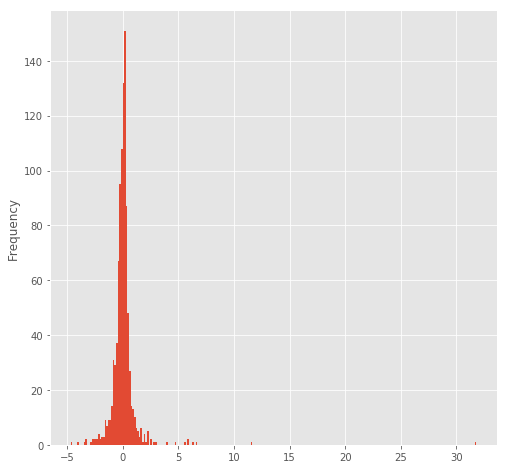

In [21]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

> With a histogram, it's hard to say...

### Are the residuals normally distributed?  `.qqplot()`

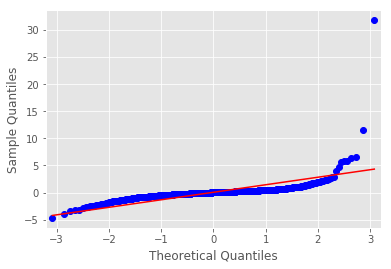

In [22]:
sm.qqplot(model.resid, line = 's')

pass

In [23]:
sm.qqplot?



> The quantiles of the distribution (vertical axis) are plotted against the (same) quantiles of a normal distribution (horizonal axis)
> `line = 's'` shows a standardized line in which the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

### Are x and $\varepsilon$ independent?  `.plot_regress_exog()`

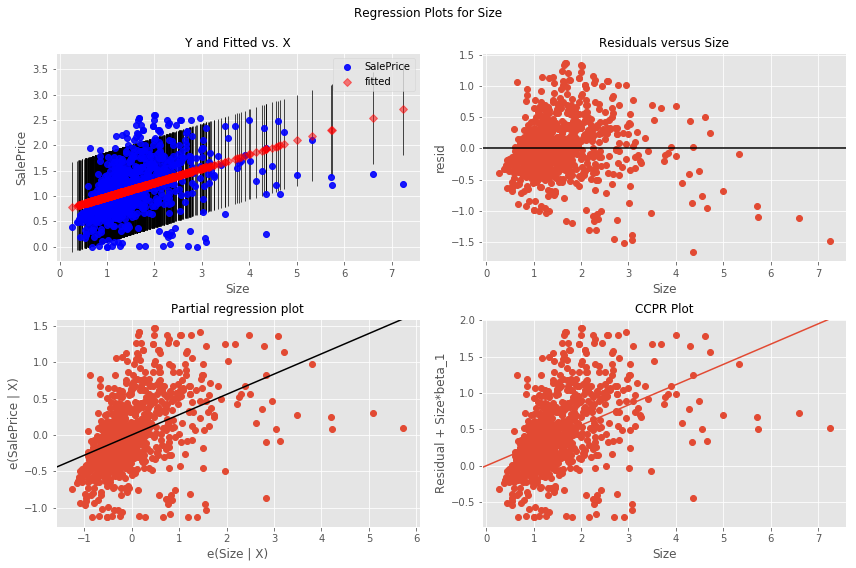

In [34]:
sm.graphics.plot_regress_exog(model, 'Size', fig = plt.figure(figsize = (12, 8)))

pass

## Part E | Model's Fit and $R^2$

In [35]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [36]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                                   Prob (F-statistic):           2.67e-58
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.rsquared

0.23559317159970783

In [38]:
y_hat = model.predict(X)

var_y_hat = sum((y - y_hat) ** 2)
var_y = sum((y - y.mean()) ** 2)

1 - var_y_hat / var_y

0.23559317159970872

### $SalePrice = \beta_1 \times Size$

In [39]:
X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.rsquared

0.56506068149064204

> #### Is it real?

In [40]:
y_hat = model.predict(X)

In [41]:
1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

0.23290434806246241

In [42]:
1 - sum((y - y_hat) ** 2) / sum((y - 0) ** 2)

0.56506068149064115

Unfortunately, no. When $\beta_0$ is forced to $0$, `statsmodels` forces $\bar y$ as $0$ in its $R^2$ formula.

## Part F | Calculating the t-value, p-value, and confidence interval for `Intercept`

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [43]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                                   Prob (F-statistic):           2.67e-58
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Given the coefficient $\beta_0$ and the standard error $SE_{\beta_0}$

In [44]:
print model.params.const
print model.bse.const

0.15505177276
0.0841577678007


> ### $t\text{-}value_{\beta_0}$:

In [45]:
model.tvalues.const

1.8423940749846963

In [46]:
t = (model.params.const - 0) / model.bse.const

t

1.8423940749846963

> ### $p\text{-}value_{\beta_0}$:

In [47]:
model.pvalues.const

0.065724161073172721

In [48]:
print 'Degrees of freedom (df):', model.df_resid

Degrees of freedom (df): 965.0


In [49]:
p = 2. * (1 - stats.t.cdf(t, model.df_resid))

p

0.065724161073172693

> ### $CI_{\beta_0}$:

In [50]:
model.conf_int().T.const

0   -0.010102
1    0.320205
Name: const, dtype: float64

In [51]:
z = stats.t.ppf(1 - .05 / 2, model.df_resid)

print 'Lower bound =', model.params.const - model.bse.const * z
print 'upper bound =', model.params.const + model.bse.const * z

Lower bound = -0.01010156253
upper bound = 0.32020510805


> ### (We can also calculate $SE_{\beta_0}$:)

In [52]:
model.bse.const

0.084157767800735972

In [53]:
XTX_1 = np.linalg.inv(np.dot(X.T, X))

XTX_1

array([[ 0.00367802, -0.00161086],
       [-0.00161086,  0.00098145]])

In [54]:
v0 = XTX_1[0, 0]

v0

0.003678024418716036

In [55]:
sigma_hat = np.sqrt(1. / model.df_resid * (y ** 2 - y_hat ** 2).sum())

In [56]:
np.sqrt(v0) * sigma_hat

0.084305651582210414